In [5]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.1.3
Numpy: 1.19.2
Sklearn: 0.23.2
Matplotlib: 3.3.2
Keras: 2.6.0


In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [7]:
cleveland = pd.read_csv('heart.csv')

In [8]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [10]:
cleveland.loc[:100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


In [11]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[:100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


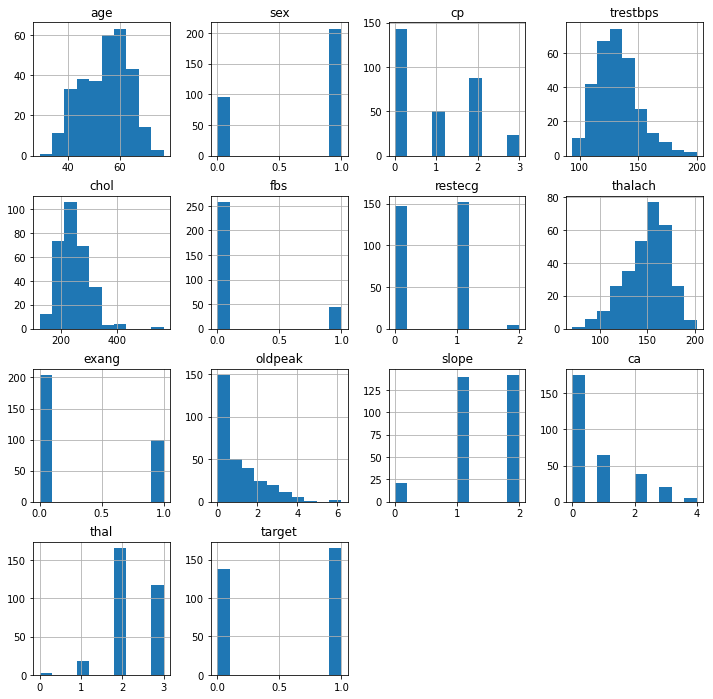

In [13]:
data.hist(figsize = (12, 12))
plt.show()

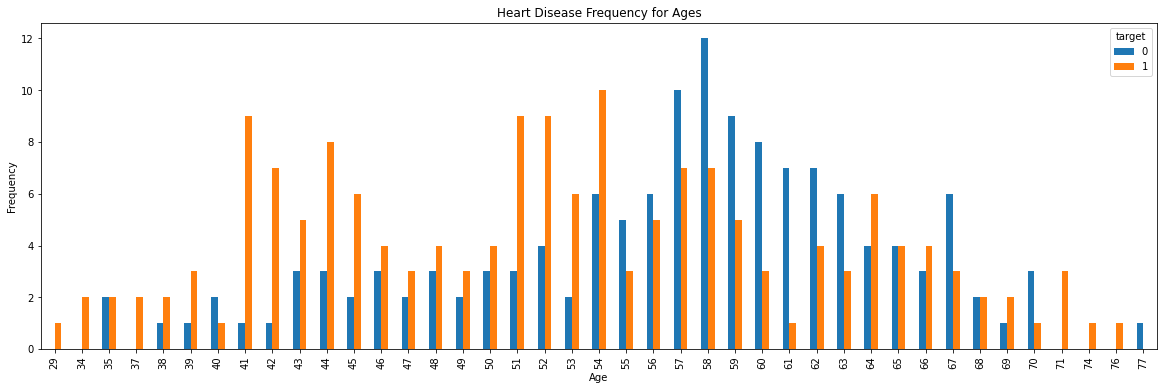

In [14]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

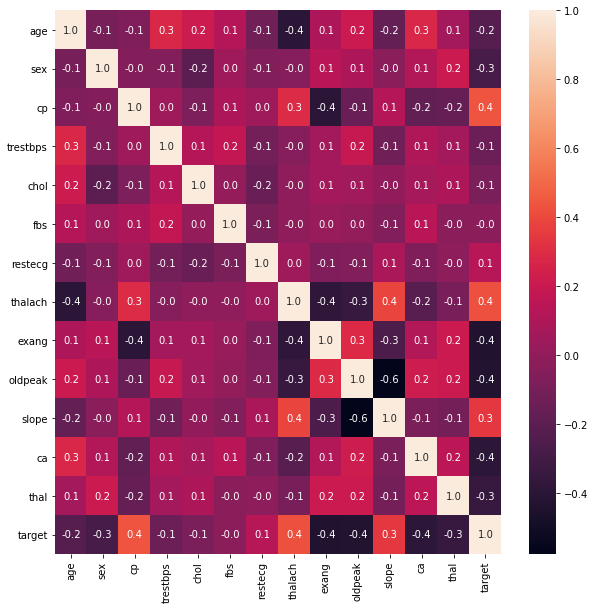

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

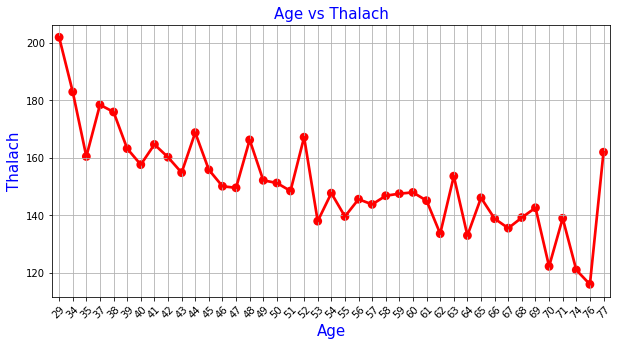

In [16]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [17]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [18]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [19]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [20]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [23]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)


Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.6827 - accuracy: 0.6818 - val_loss: 0.6701 - val_accuracy: 0.7869
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.7851 - val_loss: 0.6424 - val_accuracy: 0.7705
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.8306 - val_loss: 0.6034 - val_accuracy: 0.7869
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.8264 - val_loss: 0.5565 - val_accuracy: 0.8033
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5175 - accuracy: 0.8140 - val_loss: 0.5128 - val_accuracy: 0.8361
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.8347 - val_loss: 0.4775 - val_accuracy: 0.7541
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8554 - val_loss: 0.4523 - val_accuracy: 0.7705
Epoch 8/50
25/25 [=

In [25]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [28]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 14ms/step - loss: 0.6899 - accuracy: 0.6074 - val_loss: 0.6869 - val_accuracy: 0.6721
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6901 - val_loss: 0.6764 - val_accuracy: 0.7541
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6631 - accuracy: 0.7107 - val_loss: 0.6578 - val_accuracy: 0.7705
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7851 - val_loss: 0.6312 - val_accuracy: 0.7705
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.8017 - val_loss: 0.6026 - val_accuracy: 0.7705
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.8388 - val_loss: 0.5709 - val_accuracy: 0.8033
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.8182 - val_loss: 0.5387 - val_accuracy: 0.8033
Epoch 8/50
25/25 [=

In [30]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [31]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8524590163934426
              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61

